In [28]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import mnist
import copy as copy
import matplotlib.gridspec as gridspec
sns.set()

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.set_cmap('jet')

In [106]:
# data loading function
def load_dataset():
    mndata = mnist.MNIST('./python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0

    labels_train = labels_train.astype('int')
    labels_test = labels_test.astype('int')
    return X_train, X_test,labels_train,labels_test

# kmeans functions
def init_random_k_clusters(k):
    centroids = np.random.random((k,784))
    return centroids

def visualize_image(vector):
    #plt.figure()
    interp_method = 'bicubic'
    single_image = np.reshape(vector,[28,28])
    plt.imshow(single_image,interpolation=interp_method)
    plt.grid(False)
    plt.axis('off')
    
# cost function
def plt_cost_func_kmeans(iteration,cost):
    
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.title('iteration vs cost')
    plt.figure(dpi=600)
    plt.plot(iteration,cost)
    
def cost_func():
    
    return cost

def k_means_distance(centroids,data):
    
    data_labels = np.zeros((data.shape[0],1))
    
    for i in np.arange(data.shape[0]):
        dist_vec = []

        for j in np.arange(centroids.shape[0]):
            dist_ind = np.sqrt(np.sum((centroids[j,:]-data[i,:])**2))
            dist_vec.append(dist_ind)
            
        best_centroid = np.argmin(dist_vec)
        data_labels[i] = best_centroid
        
    return data_labels

def k_means_centroid_update(centroids,data,data_labels):
    centroids_new = np.zeros((centroids.shape))
    
    for i in np.arange(centroids.shape[0]):
        row = np.where(data_labels==i)[0]    
        
        if len(row)!=0:
            data_sel = np.squeeze(data[row[:,np.newaxis],:])
            data_mean = np.mean(data_sel,axis=0)
            centroids_new[i,:] = data_mean
        else:
            centroids_new[i,:] = np.random.random(784)
        
        

    return centroids_new

def run_k_means(k,data):
    centroids = init_random_k_clusters(k)
    not_conv = 1
    iteration = 1
    iter_vec = []
    
    while not_conv:
        labels = k_means_distance(centroids,data)
        centroids = k_means_centroid_update(centroids,data,labels)
        print(iteration)


        iteration +=1
        if iteration>10:
            not_conv = 0
            
    #import pdb;pdb.set_trace
    
    #plt.figure(dpi=600)
    #for i in np.arange(centroids.shape[0]):
        #centroids = np.nan_to_num(centroids)
      #  plt.visualize_image(centroids[i,:])
        
    #fig = plt.figure(figsize=(int(centroids.shape[0]), 1)) 
    plt.figure(dpi=600)
    #fig = plt.figure()
    ncol = 1
    nrow = centroids.shape[0]
    #gs = gridspec.GridSpec(nrow, ncol, width_ratios=[1], height_ratios=list(np.ones((centroids.shape[0],))),
    #         wspace=0.5, hspace=0.5,
    #        top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 

    for i in np.arange(nrow):
        ax = plt.subplot(nrow,1,i+1)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        interp_method = 'bicubic'
        single_image = np.reshape(np.nan_to_num(centroids[i,:]),[28,28])
        ax.imshow(single_image,interpolation=interp_method)
        plt.grid(False)
        plt.axis('off')
        fig.subplots_adjust(wspace=0, hspace=0)
        
    fig.suptitle('k = {}'.format(nrow))
    
    #plt_cost_func_kmeans(iteration,cost)
    
    return centroids


In [84]:
x_train,x_test,labels_train,labels_test = load_dataset()

2


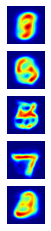

In [100]:
centroids = run_k_means(5,x_train)

2


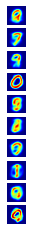

In [101]:
centroids = run_k_means(10,x_train)


1
2
3
4
5
6
7
8
9
10


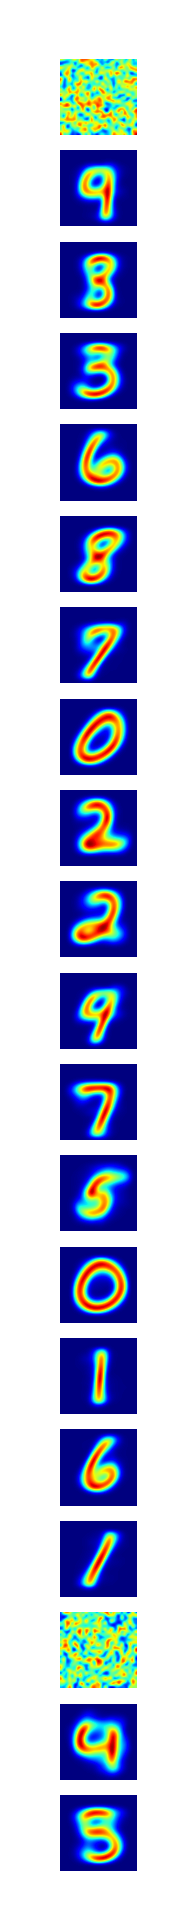

In [107]:
centroids = run_k_means(20,x_train)

